# Library

In [2]:
# Library
import os, json
import swifter
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
import pyarrow.feather as feather
import random
import time
import altair as alt
import datetime
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing
from matplotlib.lines import  Line2D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics

# About Trace

In [3]:
# cell attributes constant
cell_a_cap = {"cpu": 6835.6923828125, "mem": 4103.9453125, "size": 10001}
cell_b_cap = {"cpu": 7582.01953125, "mem": 4403.48046875, "size": 10047}
cell_c_cap = {"cpu": 7619.75146484375, "mem": 4714.116943359375, "size": 13245}
cell_d_cap = {"cpu": 6448.80810546875, "mem": 3906.895263671875, "size": 12576}
cell_e_cap = {"cpu": 7266.9423828125, "mem": 4314.7049560546875, "size": 14122}
cell_f_cap = {"cpu": 10994.15234375, "mem": 5670.78125, "size": 12201}
cell_g_cap = {"cpu": 7963.1279296875, "mem": 4485.27001953125, "size": 12796}
cell_h_cap = {"cpu": 10317.021484375, "mem": 5489.826904296875, "size": 11592}
# cell machines data
def load_machine():
    path = "machine_data/"
    cell_a = pd.read_csv(path+'machine_a.csv') 
    cell_b = pd.read_csv(path+'machine_b.csv')  
    cell_c = pd.read_csv(path+'machine_c.csv')  
    cell_d = pd.read_csv(path+'machine_d.csv') 
    cell_e = pd.read_csv(path+'machine_e.csv')  
    cell_f = pd.read_csv(path+'machine_f.csv')  
    cell_g = pd.read_csv(path+'machine_g.csv') 
    cell_h = pd.read_csv(path+'machine_h.csv')  
    cell_a["cell"] = "cell a"
    cell_b["cell"] = "cell b"
    cell_c["cell"] = "cell c"
    cell_d["cell"] = "cell d"
    cell_e["cell"] = "cell e"
    cell_f["cell"] = "cell f"
    cell_g["cell"] = "cell g"
    cell_h["cell"] = "cell h"
    all_cell = pd.concat([cell_a, cell_b,cell_c,cell_d,cell_e, cell_f,cell_g,cell_h], ignore_index=True)
    return all_cell
# Collection data from big query
def load_data(scale = 1):
    # Load in Data
    path = "collection_data/"
    cell_a = pd.read_csv(path+'cell_a.csv') 
    cell_b = pd.read_csv(path+'cell_b.csv')  
    cell_c = pd.read_csv(path+'cell_c.csv')  
    cell_d = pd.read_csv(path+'cell_d.csv') 
    cell_e = pd.read_csv(path+'cell_e.csv')  
    cell_f = pd.read_csv(path+'cell_f.csv')  
    cell_g = pd.read_csv(path+'cell_g.csv') 
    cell_h = pd.read_csv(path+'cell_h.csv')   
    # Preprocessing
    cell_a["requested_cpus"] = cell_a["requested_cpus"] /cell_a_cap['cpu'] / scale
    cell_b["requested_cpus"] = cell_b["requested_cpus"] /cell_b_cap['cpu'] / scale
    cell_c["requested_cpus"] = cell_c["requested_cpus"] /cell_c_cap['cpu'] / scale
    cell_d["requested_cpus"] = cell_d["requested_cpus"] /cell_d_cap['cpu'] / scale
    cell_e["requested_cpus"] = cell_e["requested_cpus"] /cell_e_cap['cpu'] / scale
    cell_f["requested_cpus"] = cell_f["requested_cpus"] /cell_f_cap['cpu'] / scale
    cell_g["requested_cpus"] = cell_g["requested_cpus"] /cell_g_cap['cpu'] / scale
    cell_h["requested_cpus"] = cell_h["requested_cpus"] /cell_h_cap['cpu'] / scale
    cell_a["cpu_usage"] = cell_a["cpu_usage"] /cell_a_cap['cpu'] / scale
    cell_b["cpu_usage"] = cell_b["cpu_usage"] /cell_b_cap['cpu'] / scale
    cell_c["cpu_usage"] = cell_c["cpu_usage"] /cell_c_cap['cpu'] / scale
    cell_d["cpu_usage"] = cell_d["cpu_usage"] /cell_d_cap['cpu'] / scale
    cell_e["cpu_usage"] = cell_e["cpu_usage"] /cell_e_cap['cpu'] / scale
    cell_f["cpu_usage"] = cell_f["cpu_usage"] /cell_f_cap['cpu'] / scale
    cell_g["cpu_usage"] = cell_g["cpu_usage"] /cell_g_cap['cpu'] / scale
    cell_h["cpu_usage"] = cell_h["cpu_usage"] /cell_h_cap['cpu'] / scale
    cell_a["requested_memory"] = cell_a["requested_memory"] /cell_a_cap['mem'] / scale
    cell_b["requested_memory"] = cell_b["requested_memory"] /cell_b_cap['mem'] / scale
    cell_c["requested_memory"] = cell_c["requested_memory"] /cell_c_cap['mem'] / scale
    cell_d["requested_memory"] = cell_d["requested_memory"] /cell_d_cap['mem'] / scale
    cell_e["requested_memory"] = cell_e["requested_memory"] /cell_e_cap['mem'] / scale
    cell_f["requested_memory"] = cell_f["requested_memory"] /cell_f_cap['mem'] / scale
    cell_g["requested_memory"] = cell_g["requested_memory"] /cell_g_cap['mem'] / scale
    cell_h["requested_memory"] = cell_h["requested_memory"] /cell_h_cap['mem'] / scale
    cell_a["memory_usage"] = cell_a["memory_usage"] /cell_a_cap['mem'] / scale
    cell_b["memory_usage"] = cell_b["memory_usage"] /cell_b_cap['mem'] / scale
    cell_c["memory_usage"] = cell_c["memory_usage"] /cell_c_cap['mem'] / scale
    cell_d["memory_usage"] = cell_d["memory_usage"] /cell_d_cap['mem'] / scale
    cell_e["memory_usage"] = cell_e["memory_usage"] /cell_e_cap['mem'] / scale
    cell_f["memory_usage"] = cell_f["memory_usage"] /cell_f_cap['mem'] / scale
    cell_g["memory_usage"] = cell_g["memory_usage"] /cell_g_cap['mem'] / scale
    cell_h["memory_usage"] = cell_h["memory_usage"] /cell_h_cap['mem'] / scale
    cell_a["cell"] = "cell a"
    cell_b["cell"] = "cell b"
    cell_c["cell"] = "cell c"
    cell_d["cell"] = "cell d"
    cell_e["cell"] = "cell e"
    cell_f["cell"] = "cell f"
    cell_g["cell"] = "cell g"
    cell_h["cell"] = "cell h"
    all_cell = pd.concat([cell_a, cell_b,cell_c,cell_d,cell_e, cell_f,cell_g,cell_h], ignore_index=True)
    all_cell['tier'] = all_cell['tier'].replace(
        {'1_free':'free tier', '2_beb':'beb tier', '3_mid':'mid tier', '4_prod':'prod tier'})
    return all_cell
def process(scaler = ''):
    numeric = ['']
    if (scaler == "MinMax"):
        df = jobs[['requested_cpus', 'requested_memory', 
            'memory_usage', 'page_cache_memory', 'cycles_per_instruction',
            'memory_accesses_per_instruction']]
        df = MinMaxScaler().fit_transform(df)
    elif (scaler == ""):
        print(1)

In [77]:
all_cell = load_data(scale = 0.01)
usage = all_cell[['cell', "tier", "cpu_usage", "memory_usage"]]
usage.columns = ['cell', 'tier', "NCU", "NMU"]
usage = usage.set_index(["cell","tier"]).stack().reset_index()
usage.columns = ['cell', 'tier', 'category', 'value']
usage = usage.groupby(['cell', 'tier', 'category'])["value"].sum()
usage = usage.reset_index()
request = all_cell[['cell', "tier", "requested_cpus", "requested_memory"]]
request.columns = ['cell', 'tier', "NCU", "NMU"]
request = request.set_index(["cell","tier"]).stack().reset_index()
request.columns = ['cell', 'tier', 'category', 'value']
request = request.groupby(['cell', 'tier', 'category'])["value"].sum()
request = request.reset_index()

In [78]:
def my_theme():
  return {
    'config': {
      'view': {'continuousHeight': 300, 'continuousWidth': 400},  # from the default theme
    }
  }
domain = ['free tier', 'beb tier', 'mid tier', 'prod tier']
range_ = ['#ead3b1', '#c8f6c7', '#4856ff', '#80007f']
alt.themes.register('my_theme', my_theme)
alt.themes.enable('my_theme')
alt.Chart(usage).mark_bar(opacity=0.8).transform_calculate(
    order="{'free tier':4, 'beb tier': 3, 'mid tier': 2, 'prod tier': 1}[datum.tier]"  
).encode(
    x=alt.X('category', title=None, sort = "y"),
    y=alt.Y('value:Q', axis=alt.Axis(grid=True, title='Sample at 1% resource usage as total GCU')), 
    column=alt.Column('cell', title=None),
    color = alt.Color("tier", scale=alt.Scale(domain=domain, range=range_)),
    order="order:O"
).configure_view(
    strokeOpacity=0.3,
)

alt.Chart(...)

In [79]:
alt.Chart(request).mark_bar(opacity=0.8).transform_calculate(
    order="{'free tier':4, 'beb tier': 3, 'mid tier': 2, 'prod tier': 1}[datum.tier]" ,
).encode(
    x=alt.X('category', title=None, sort = "-y"),
    y=alt.Y('value:Q', axis=alt.Axis(grid=True, title='Sample at 1% resource request as total GCU')), 
    column=alt.Column('cell', title=None),
    color = alt.Color("tier", scale=alt.Scale(domain=domain, range=range_)),
    order="order:O"
).configure_view(
    strokeOpacity=0.3,
)

alt.Chart(...)

# About Machine

In [798]:
machine_a = pd.DataFrame.from_dict(cell_a_cap, orient='index').T
machine_b = pd.DataFrame.from_dict(cell_b_cap, orient='index').T
machine_c = pd.DataFrame.from_dict(cell_c_cap, orient='index').T
machine_d = pd.DataFrame.from_dict(cell_d_cap, orient='index').T
machine_e = pd.DataFrame.from_dict(cell_e_cap, orient='index').T
machine_f = pd.DataFrame.from_dict(cell_f_cap, orient='index').T
machine_g = pd.DataFrame.from_dict(cell_g_cap, orient='index').T
machine_h = pd.DataFrame.from_dict(cell_h_cap, orient='index').T
machine_a['Machine'] = "cell a"
machine_b['Machine'] = "cell b"
machine_c['Machine'] = "cell c"
machine_d['Machine'] = "cell d"
machine_e['Machine'] = "cell e"
machine_f['Machine'] = "cell f"
machine_g['Machine'] = "cell g"
machine_h['Machine'] = "cell h"
machine = pd.concat([machine_a, machine_b, machine_c, machine_d, machine_e, machine_f,machine_g, machine_h], axis= 0)
machine.columns = ["CPU total capacity", "Memory total capacity", "Size", "Machine"]
machine['Size'] = StandardScaler().fit_transform(machine[['Size']])
alt.Chart(machine, title="Cell capacity overview").mark_circle(filled=True).encode(
    x = alt.X('Memory total capacity:Q', scale=alt.Scale(domain=(3500, 6000))),
    y = alt.Y('CPU total capacity:Q', scale=alt.Scale(domain=(5500, 11500))),
    size = alt.Size('Size:Q', scale=alt.Scale(range=[500,1000])),
    color = alt.Color('Machine')
)

alt.Chart(...)

In [791]:
# Machine Overview
all_machine = load_machine()
machines = all_machine.groupby(['cpu_cap', 'memory_cap']).size()
machines = pd.DataFrame(machines).reset_index()
machines.columns = ['CPU capacity', 'Memory capcity', 'count']
alt.Chart(machines, title = "Frequency of machine shapes as a function of CPU and memory (RAM) capacity").mark_point(filled=True).encode(
    x = alt.X('CPU capacity:Q', scale=alt.Scale(domain=(0, 1.1))),
    y = alt.Y('Memory capcity:Q', scale=alt.Scale(domain=(0, 1.1))),
    size = alt.Size('count:Q', scale=alt.Scale(range=[0,1000]))
)


alt.Chart(...)

# About Sample

In [341]:
numeric = ['priority', 'requested_cpus', 'requested_memory', 'cpu_usage', 'memory_usage', 'page_cache_memory',
    'cycles_per_instruction', 'memory_accesses_per_instruction','lifetime','number']
categorical = ['tier', 'scheduling_class','collection_type', 'vertical_scaling', 'scheduler']
jobs = load_data().fillna(0)

In [326]:
def give_quantile(df, col):
    animals = "Animals"
    hogmice = "Hog Mice"
    df[animals] = pd.qcut(df[col], q=[0, 0.95, 0.99, 0.998,1], labels=['mice (0-95$)', 'snake (95-99%$)' ,'hog (99-99.8%$)', 'lion (99.8-100%$)'])
    df[hogmice] = pd.qcut(df[col], q=[0, 0.99,1], labels=['mice (0-99$)','hog (99-100%)'])
    info = df.groupby(animals)[col].mean()/df.groupby(animals)[col].mean().sum()
    print(info)
    print("---------------------------------")
    info = df.groupby(hogmice)[col].mean()/df.groupby(hogmice)[col].mean().sum()
    print(info)
    print("---------------------------------")
give_quantile(jobs, "requested_cpus")

Animals
mice (0-95$)         0.000069
snake (95-99%$)      0.003317
hog (99-99.8%$)      0.036845
lion (99.8-100%$)    0.959770
Name: requested_cpus, dtype: float64
---------------------------------
Hog Mice
mice (0-99$)     0.000902
hog (99-100%)    0.999098
Name: requested_cpus, dtype: float64
---------------------------------


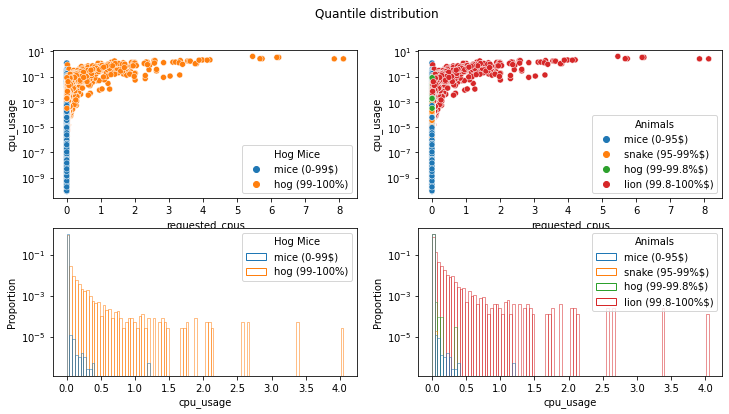

In [129]:
# Quantile Distribution
fig,ax = plt.subplots(2,2, figsize = (12,6))
sns.scatterplot(data=jobs, x="requested_cpus", y="cpu_usage", hue="Hog Mice", ax = ax[0,0])
sns.scatterplot(data=jobs, x="requested_cpus", y="cpu_usage", hue="Animals", ax = ax[0,1])
sns.histplot(
    data=jobs, x="cpu_usage", hue="Hog Mice", bins = 100,
    log_scale=False, element="bars", fill=False,
    cumulative=False, stat="proportion", common_norm=False, ax = ax[1,0]
)
sns.histplot(
    data=jobs, x="cpu_usage", hue="Animals", bins = 100,
    log_scale=False, element="bars", fill=False,
    cumulative=False, stat="proportion", common_norm=False, ax = ax[1,1]
)
fig.suptitle('Quantile distribution')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

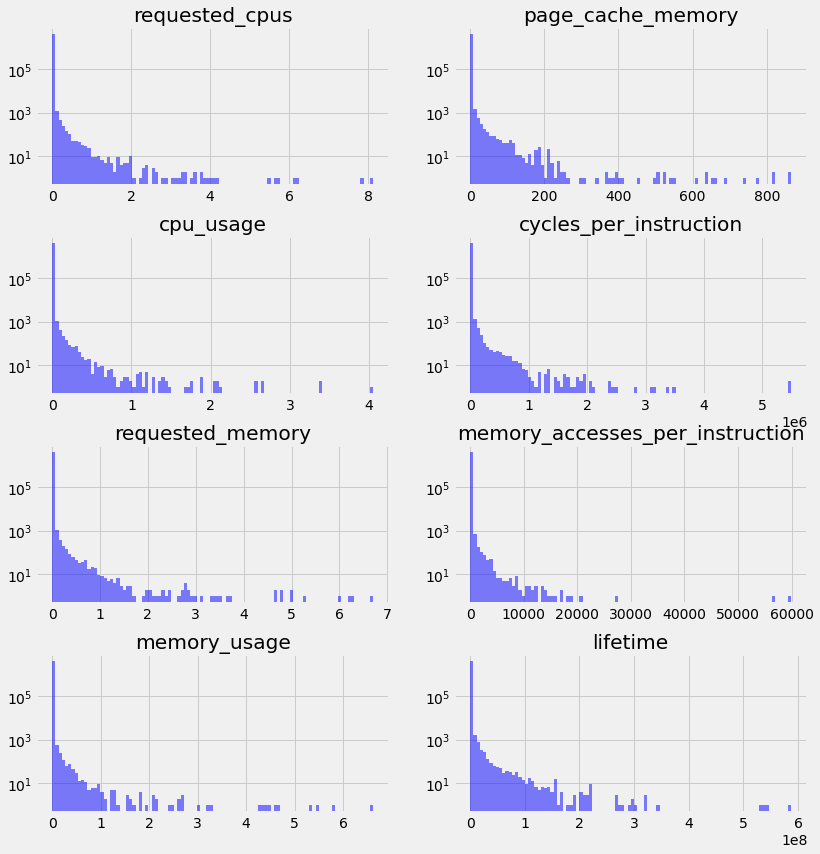

In [342]:
# Feature distribution overview
nrow = 4
ncol = 2
fig, axs = plt.subplots(nrow,ncol, figsize = (12,12))
fig.tight_layout(pad=2.0)
t = axs[0,0].hist(jobs['requested_cpus'], bins = 100, facecolor='blue', alpha=0.5)
axs[0,0].set_title('requested_cpus')
t = axs[1,0].hist(jobs['cpu_usage'], bins = 100, facecolor='blue', alpha=0.5)
axs[1,0].set_title('cpu_usage')
t = axs[2,0].hist(jobs['requested_memory'], bins = 100, facecolor='blue', alpha=0.5)
axs[2,0].set_title('requested_memory')
t = axs[3,0].hist(jobs['memory_usage'], bins = 100, facecolor='blue', alpha=0.5)
axs[3,0].set_title('memory_usage')
t = axs[0,1].hist(jobs['page_cache_memory'], bins = 100, facecolor='blue', alpha=0.5)
axs[0,1].set_title('page_cache_memory')
t = axs[1,1].hist(jobs['cycles_per_instruction'], bins = 100, facecolor='blue', alpha=0.5)
axs[1,1].set_title('cycles_per_instruction')
t = axs[2,1].hist(jobs['memory_accesses_per_instruction'], bins = 100, facecolor='blue', alpha=0.5)
axs[2,1].set_title('memory_accesses_per_instruction')
t = axs[3,1].hist(jobs['lifetime'], bins = 100, facecolor='blue', alpha=0.5)
axs[3,1].set_title('lifetime')
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[2,0].set_yscale('log')
axs[3,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
axs[2,1].set_yscale('log')
axs[3,1].set_yscale('log')

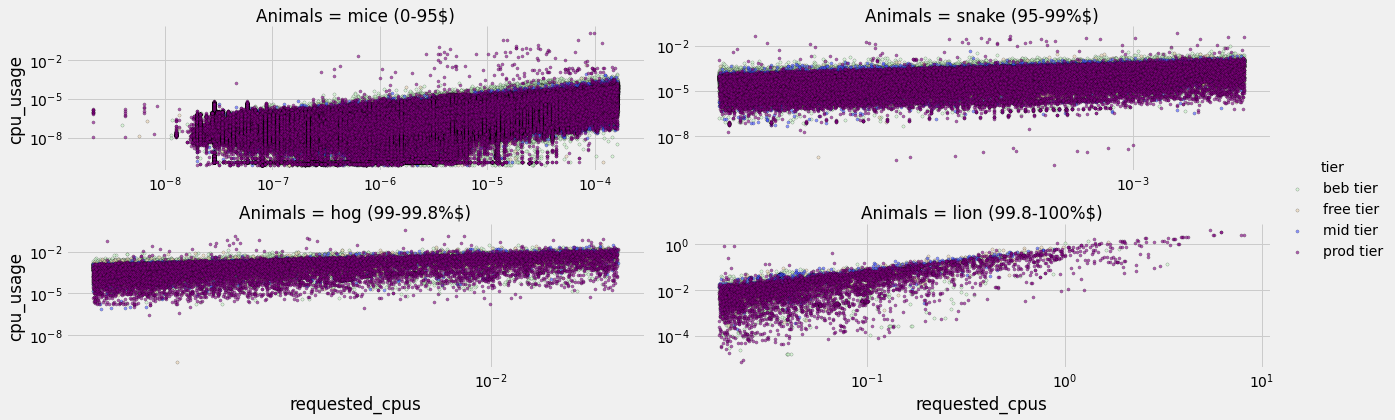

In [331]:
def get_palette():
  pal =  {
      'free tier': "#ead3b1", 
      'beb tier': "#c8f6c7", 
      'mid tier': "#4856ff", 
      'prod tier': "#80007f", 
  }
  return pal
x = "requested_cpus"
y = "cpu_usage"
# RUN FACET GRID
g = sns.FacetGrid(jobs, col="Animals", hue="tier", col_wrap=2, 
                  aspect=3, palette=get_palette(),
                  hue_order= list(jobs.tier.unique()),
                  sharex=False, sharey=False)
g = (g.map(sns.scatterplot, x, y, 
           edgecolor='black', alpha=0.6, s=10).set(xscale = 'log', yscale = 'log')
      .add_legend())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

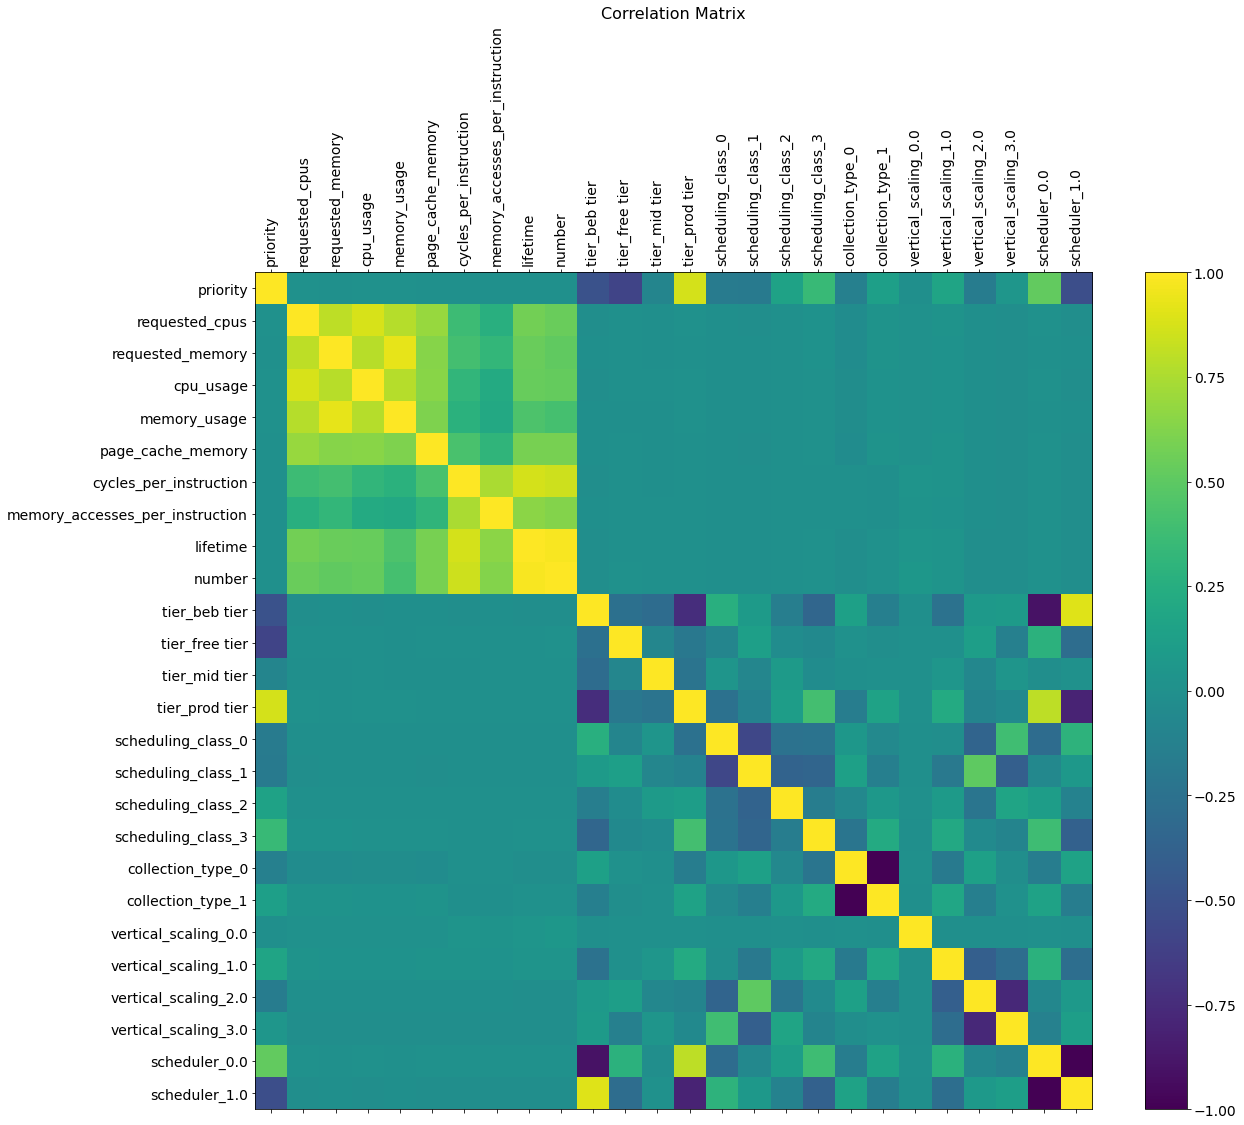

In [132]:
# Generate a custom diverging colormap
jobs = pd.get_dummies(jobs, columns=categorical, drop_first=False)
f = plt.figure(figsize=(19, 15))
plt.matshow(jobs.corr(), fignum=f.number)
plt.xticks(range(jobs.select_dtypes(['number']).shape[1]), jobs.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(jobs.select_dtypes(['number']).shape[1]), jobs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Process & Split Data

In [343]:
numeric = ['priority','requested_cpus', 'requested_memory', 'page_cache_memory','cpu_usage','memory_usage',
    'cycles_per_instruction', 'memory_accesses_per_instruction','lifetime','number']
categorical = ['tier', 'scheduling_class','collection_type', 'vertical_scaling', 'scheduler', "Hog Mice", "Animals"]
df = load_data().fillna(0).drop(columns = ['cell'])
#df[numeric] = MinMaxScaler().fit_transform(df[numeric])
#give_quantile(df, 'cpu_usage')

In [385]:
jobs = df.copy()

In [312]:
jobs["requested_cpus"] = jobs["requested_cpus"] ** -0.5
for c in numeric:
    jobs[c] = np.log(jobs[c]+1)
jobs["requested_cpus"] = np.log(jobs["requested_cpus"]+1)

In [378]:
print(jobs.requested_cpus.max(), jobs.requested_cpus.min())

0.37353191990417356

In [377]:
jobs

,priority,tier,scheduling_class,requested_cpus,requested_memory,cpu_usage,memory_usage,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,collection_type,vertical_scaling,scheduler,lifetime,number
0,0.698627,beb tier,0,9.531565e-07,7.566277e-07,5.050399e-07,2.281969e-07,0.000118,0.00000,0.000000,0,2.0,1.0,0.682373,0.352793
1,0.694465,beb tier,2,4.923608e-04,3.956471e-04,1.882594e-06,2.445970e-04,0.110151,0.70568,0.371826,0,1.0,0.0,0.793674,0.671335
2,0.639539,free tier,2,1.185306e-06,2.147189e-07,1.445364e-07,1.394279e-07,0.000282,0.00000,0.000000,0,2.0,0.0,0.657456,0.352793
3,0.639539,free tier,2,1.288732e-06,2.156484e-07,1.799729e-07,8.505102e-08,0.000212,0.00000,0.000000,0,2.0,0.0,0.598994,0.352793
4,0.699435,mid tier,2,1.889938e-06,7.008567e-07,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0,3.0,1.0,0.352793,0.352793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940309,0.714998,prod tier,3,5.826074e-06,3.479412e-06,4.082938e-07,3.652887e-06,0.001076,0.00000,0.000000,1,3.0,0.0,0.762816,0.561701
3940310,0.714998,prod tier,3,6.315283e-07,1.408842e-07,1.107395e-07,1.205593e-07,0.000004,0.00000,0.000000,0,2.0,0.0,0.486000,0.352793
3940311,0.714998,prod tier,3,2.133444e-07,1.158690e-07,1.469748e-08,2.258316e-09,0.000003,0.00000,0.000000,0,2.0,0.0,0.441230,0.352793
3940312,0.714998,prod tier,3,5.716293e-07,1.408842e-07,4.991597e-09,1.737166e-10,0.000000,0.00000,0.000000,0,2.0,0.0,0.352793,0.352793


In [355]:
jobs.requested_cpus.min()

0.0

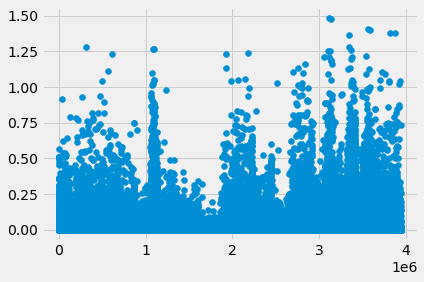

In [396]:
a = plt.scatter(jobs.index, np.sqrt(np.log(jobs['requested_cpus']+1)))
# plt.yscale('log')
plt.show()

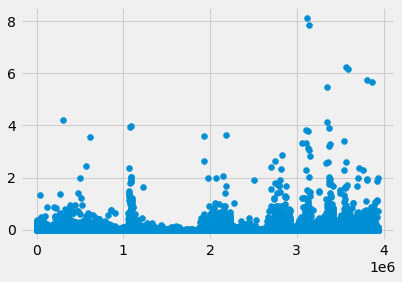

In [392]:
a = plt.scatter(jobs.index, jobs['requested_cpus'])
# plt.yscale('log')
plt.show()

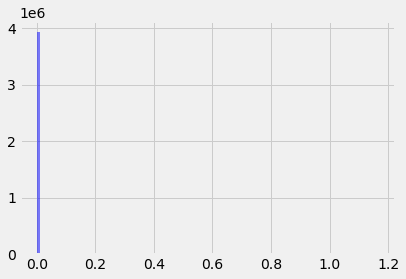

In [358]:
a = plt.hist(jobs['requested_cpus'], bins = 100, facecolor='blue', alpha=0.5)
# plt.yscale('log')
plt.show()

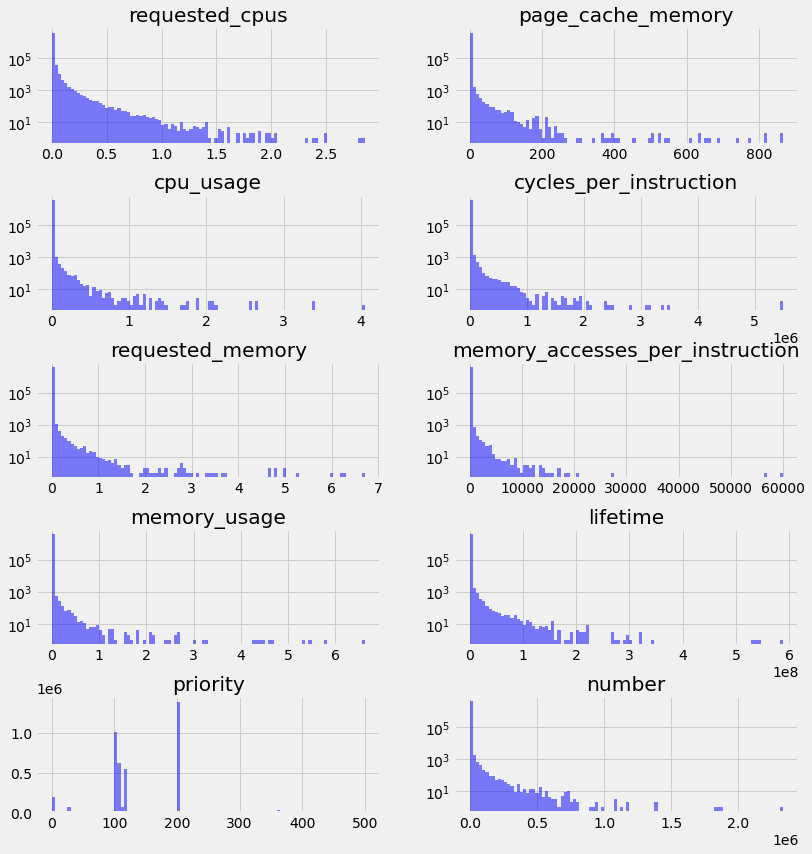

In [323]:
# Feature distribution overview
nrow = 5
ncol = 2
fig, axs = plt.subplots(nrow,ncol, figsize = (12,12))
fig.tight_layout(pad=2.0)
t = axs[0,0].hist(jobs['requested_cpus'], bins = 100, facecolor='blue', alpha=0.5)
axs[0,0].set_title('requested_cpus')
t = axs[1,0].hist(jobs['cpu_usage'], bins = 100, facecolor='blue', alpha=0.5)
axs[1,0].set_title('cpu_usage')
t = axs[2,0].hist(jobs['requested_memory'], bins = 100, facecolor='blue', alpha=0.5)
axs[2,0].set_title('requested_memory')
t = axs[3,0].hist(jobs['memory_usage'], bins = 100, facecolor='blue', alpha=0.5)
axs[3,0].set_title('memory_usage')
t = axs[4,0].hist(jobs['priority'], bins = 100, facecolor='blue', alpha=0.5)
axs[4,0].set_title('priority')
t = axs[0,1].hist(jobs['page_cache_memory'], bins = 100, facecolor='blue', alpha=0.5)
axs[0,1].set_title('page_cache_memory')
t = axs[1,1].hist(jobs['cycles_per_instruction'], bins = 100, facecolor='blue', alpha=0.5)
axs[1,1].set_title('cycles_per_instruction')
t = axs[2,1].hist(jobs['memory_accesses_per_instruction'], bins = 100, facecolor='blue', alpha=0.5)
axs[2,1].set_title('memory_accesses_per_instruction')
t = axs[3,1].hist(jobs['lifetime'], bins = 100, facecolor='blue', alpha=0.5)
axs[3,1].set_title('lifetime')
t = axs[4,1].hist(jobs['number'], bins = 100, facecolor='blue', alpha=0.5)
axs[4,1].set_title('number')
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[2,0].set_yscale('log')
axs[3,0].set_yscale('log')
axs[4,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
axs[2,1].set_yscale('log')
axs[3,1].set_yscale('log')
axs[4,1].set_yscale('log')

# About Clustering

In [10]:
def plot_elbow(SSE):
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, 10), SSE)
    plt.xticks(range(2, 10))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

## K-Means

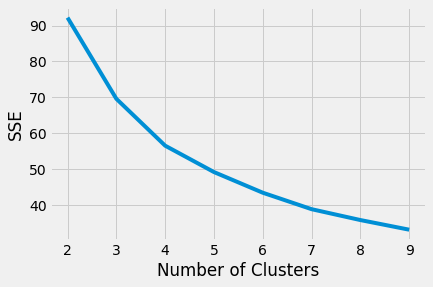

In [279]:
data = df[numeric] # Kmenas only support numeric
SSE = []
kmean_result = pd.DataFrame()
kmeans_ls = []
for i in range(2, 10):
    kmeans = KMeans(i)
    identified_cluster = kmeans.fit_predict(data)
    SSE.append(kmeans.inertia_)
    name = "cluster_" + str(i)
    kmean_result[name] = identified_cluster
    kmeans_ls.append(kmeans)
plot_elbow(SSE)
kmean_cluster = kmean_result['cluster_4']

In [286]:
df['cluster'] = kmean_result['cluster_8']
df.columns

Index(['priority', 'tier', 'scheduling_class', 'requested_cpus',
       'requested_memory', 'cpu_usage', 'memory_usage', 'page_cache_memory',
       'cycles_per_instruction', 'memory_accesses_per_instruction',
       'collection_type', 'vertical_scaling', 'scheduler', 'lifetime',
       'number', 'Animals', 'Hog Mice', 'cluster'],
      dtype='object')

In [324]:
x = "requested_cpus"
y = "lifetime"
# RUN FACET GRID
g = sns.FacetGrid(df, col="Animals", hue="tier", col_wrap=2, 
                  aspect=3, 
                  sharex=False, sharey=False)
g = (g.map(sns.scatterplot, x, y, 
           edgecolor='black', alpha=0.6, s=10).set(yscale = 'log', xscale = 'log')
      .add_legend())
plt.show()

KeyError: 'Animals'

## K-Mode

In [5]:
data = X_train
le = preprocessing.LabelEncoder()
data[categorical] = data[categorical].apply(le.fit_transform)
categorical_idx = [data.columns.get_loc(c) for c in categorical if c in data]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3069, ncost: 6678.925440467928
Run: 1, iteration: 2/100, moves: 0, ncost: 6678.925440467928
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 17357, ncost: 6678.925440467926
Run: 2, iteration: 2/100, moves: 0, ncost: 6678.925440467926
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 11080, ncost: 6678.925440467921
Run: 3, iteration: 2/100, moves: 0, ncost: 6678.925440467921
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 5487, ncost: 6678.960906872847
Run: 4, iteration: 2/100, moves: 361, ncost: 6678.925440467924
Run: 4, iteration: 3/100, moves: 0, ncost: 6678.925440467924
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 34

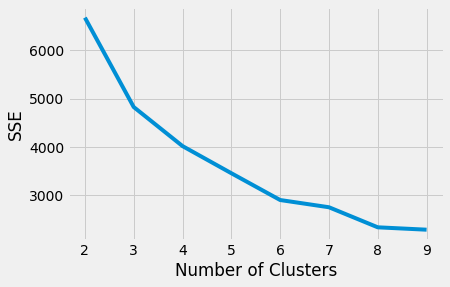

In [214]:
sample = data.sample(n=100000, replace=False)
SSE = []
kmode_result = pd.DataFrame()
for i in range(2, 10):
    kproto = KPrototypes(n_clusters= i, init='Huang', verbose=2)
    identified_cluster = kproto.fit_predict(sample, categorical= categorical_idx)
    SSE.append(kproto.cost_)
    name = "cluster_" + str(i)
    kmode_result[name] = identified_cluster
plot_elbow(SSE)

In [ ]:
kproto = KPrototypes(n_clusters= 8, init='Huang', verbose=2)
kmode_cluster = kproto.fit_predict(data, categorical= categorical_idx)

# About Regression

In [246]:
categorical = ['tier', 'scheduling_class','collection_type', 'vertical_scaling', 'scheduler', "Hog Mice", "Animals", 'cluster']
Y_cpu = df.cpu_usage
Y_mem = df.memory_usage
X = df[df.columns.difference(['cpu_usage','memory_usage'])]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_cpu, test_size=0.3)

## Lasso Regression

In [226]:
def lasso_importance(reg, X, log = False):
    coef = pd.Series(reg.coef_, index = X.columns)
    imp_coef = abs(coef.sort_values())
    imp_coef.plot(kind = "bar")
    if log == True:
        plt.yscale('log')
    plt.title("Feature importance of Lasso")

Alpha 9.360069934521324e-09
R squared training set 77.35
R squared test set 82.85


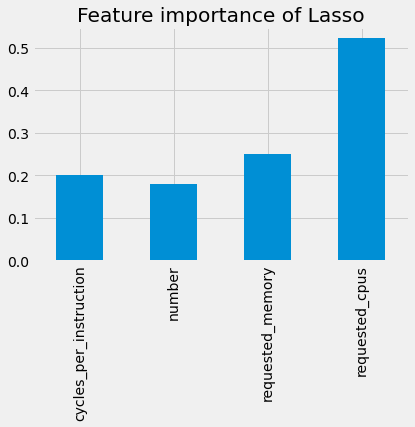

In [247]:
numeric = ['requested_cpus', 'requested_memory','cycles_per_instruction','number']
# categorical = ['tier', 'scheduling_class','collection_type', 'vertical_scaling', 'scheduler']
# Original
og_X_train = X_train[numeric]
og_X_test = X_test[numeric]
# og_X_train = pd.get_dummies(og_X_train, columns=categorical, drop_first=False)
# og_X_test = pd.get_dummies(og_X_test, columns=categorical, drop_first=False)
# Lasso with 5 fold cross-validation
model = LassoCV(cv=10, random_state=2487, max_iter=10000)
model.fit(og_X_train, y_train)
# Fit model
reg = Lasso(alpha=model.alpha_)
reg.fit(og_X_train, y_train)
print("Alpha", model.alpha_)
print('R squared training set', round(reg.score(og_X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(og_X_test, y_test)*100, 2))
lasso_importance(reg, og_X_train)

----------<Mice Hog>----------
Alpha 3.2007884256721625e-08
R squared training set 77.25
R squared test set 82.58


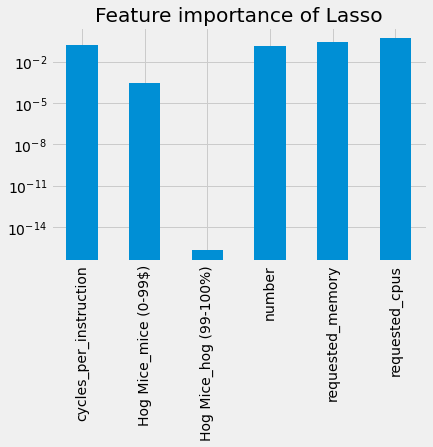

In [251]:
# W. Mice Hog
numeric = ['requested_cpus', 'requested_memory','cycles_per_instruction','number']
categorical = ['Hog Mice']
# Original
mh_X_train = X_train[numeric + categorical]
mh_X_test = X_test[numeric + categorical]
mh_X_train = pd.get_dummies(mh_X_train, columns=categorical, drop_first=False)
mh_X_test = pd.get_dummies(mh_X_test, columns=categorical, drop_first=False)
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=2487, max_iter=10000)
model.fit(mh_X_train, y_train)
# Fit model
reg = Lasso(alpha=model.alpha_)
reg.fit(mh_X_train, y_train)
print("----------<Mice Hog>----------")
print("Alpha", model.alpha_)
print('R squared training set', round(reg.score(mh_X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(mh_X_test, y_test)*100, 2))
lasso_importance(reg, mh_X_train, True)

----------<Animals>----------
Alpha 3.208917484753233e-08
R squared training set 77.52
R squared test set 82.37


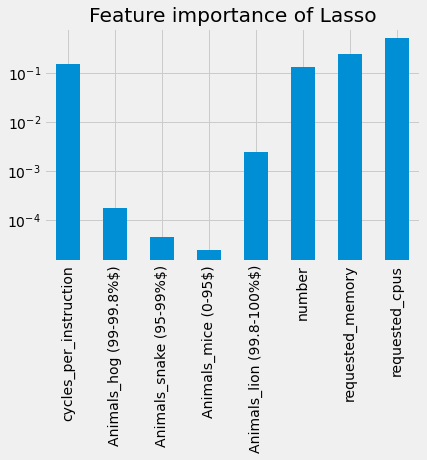

In [248]:
# W. Mice Hog
numeric = ['requested_cpus', 'requested_memory','cycles_per_instruction','number']
categorical = ['Animals']
# Original
am_X_train = X_train[numeric + categorical]
am_X_test = X_test[numeric + categorical]
am_X_train = pd.get_dummies(am_X_train, columns=categorical, drop_first=False)
am_X_test = pd.get_dummies(am_X_test, columns=categorical, drop_first=False)
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=2487, max_iter=10000)
model.fit(am_X_train, y_train)
# Fit model
reg = Lasso(alpha=model.alpha_)
reg.fit(am_X_train, y_train)
print("----------<Animals>----------")
print("Alpha", model.alpha_)
print('R squared training set', round(reg.score(am_X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(am_X_test, y_test)*100, 2))
lasso_importance(reg, am_X_train, True)

----------<Clusters>----------
Alpha 9.284328271677683e-09
R squared training set 77.36
R squared test set 82.85


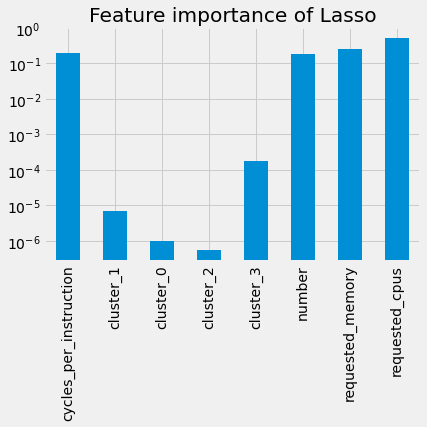

In [249]:
# W. K-mean Cluster
numeric = ['requested_cpus', 'requested_memory','cycles_per_instruction','number']
categorical = ['cluster']
# Original
km_X_train = X_train[numeric + categorical]
km_X_test = X_test[numeric + categorical]
km_X_train = pd.get_dummies(km_X_train, columns=categorical, drop_first=False)
km_X_test = pd.get_dummies(km_X_test, columns=categorical, drop_first=False)

# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=2487, max_iter=10000)
model.fit(km_X_train, y_train)
# Fit model
reg = Lasso(alpha=model.alpha_)
reg.fit(km_X_train, y_train)
print("----------<Clusters>----------")
print("Alpha", model.alpha_)
print('R squared training set', round(reg.score(km_X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(km_X_test, y_test)*100, 2))
lasso_importance(reg, km_X_train, True)

## Random Forest

In [209]:
sample = df.sample(n=1000000, replace=False)
Y_cpu = sample.cpu_usage
Y_mem = sample.memory_usage
X = sample[sample.columns.difference(['cpu_usage','memory_usage'])]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_cpu, test_size=0.3)
numeric = ['priority', 'requested_cpus', 'requested_memory', 'page_cache_memory',
    'cycles_per_instruction', 'memory_accesses_per_instruction','lifetime','number']
categorical = ['tier', 'scheduling_class','collection_type', 'vertical_scaling', 'scheduler', "Hog Mice", "Animals"]
rf_X_train = X_train[numeric + categorical]
rf_X_test = X_test[numeric + categorical]
rf_X_train = pd.get_dummies(rf_X_train, columns=categorical, drop_first=False)
rf_X_test = pd.get_dummies(rf_X_test, columns=categorical, drop_first=False)

In [210]:
rf = RandomForestRegressor(max_depth=10, n_estimators= 500, random_state=2487,oob_score=True)
rf.fit(rf_X_train, y_train)
y_true = y_test# Your real values / test labels
y_pred = rf.predict(rf_X_test)# The predictions from your ML / RF model
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_true, y_pred))
print(rf.oob_score_)

Mean Absolute Error (MAE): 1.7111865053999122e-05
Mean Squared Error (MSE): 2.3647965757902506e-06
Root Mean Squared Error (RMSE): 0.001537789509585187
Mean Absolute Percentage Error (MAPE): 39393000.90484875
Explained Variance Score: 0.7487872330078983
Max Error: 0.5614900961533238
Mean Squared Log Error: 1.183273962108741e-06
Median Absolute Error: 1.4892934413222812e-07
R^2: 0.7487861246753578
Mean Poisson Deviance: 1.3480578998164727e-05
0.740055477687415


Text(0.5, 1.0, 'Feature Importance of Random Forest')

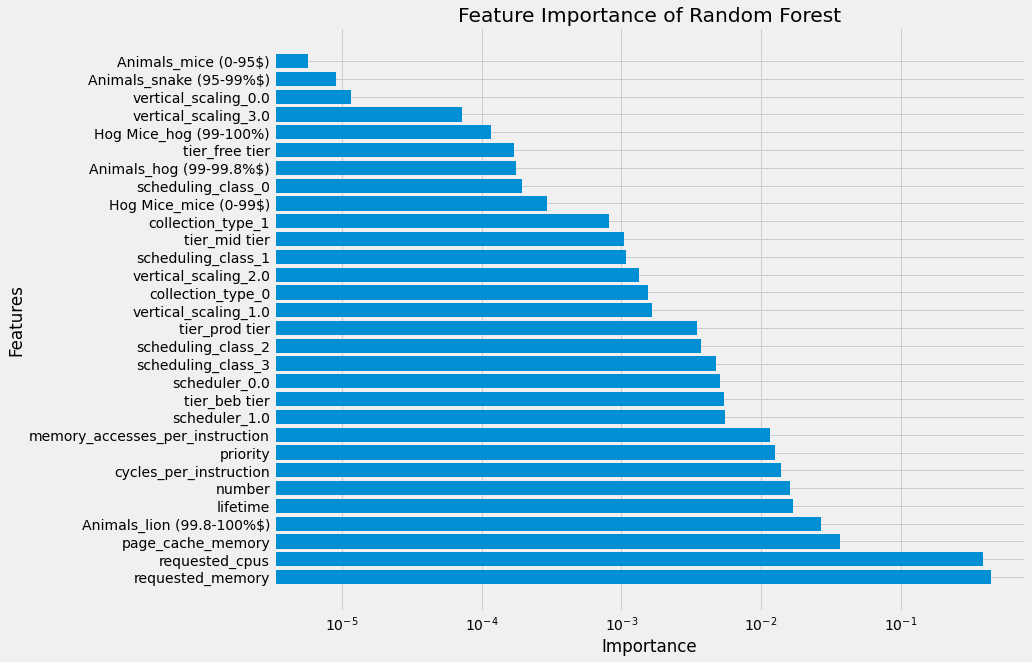

In [211]:
feature_list = rf_X_train.columns
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances]
feature_list = []
importances = []
for pair in feature_importances:
    feature_list.append(pair[0])
    importances.append(pair[1])
plt.figure(figsize=(12, 10))  # width:20, height:3
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.barh(feature_list, importances, align='center')
# Tick labels for x axis
plt.yticks(x_values, feature_list)
plt.xscale('log')
# Axis labels and title
plt.ylabel('Features'); plt.xlabel('Importance'); plt.title('Feature Importance of Random Forest')